# Tổng Quan Về Dữ Liệu EEG.

>[Báo cáo tổng quan về dữ liệu EEG](#scrollTo=f5ODJXmNVQNV)

>>[Mục lục](#scrollTo=a_qHyq-icdlu)

>>>[1. Giới thiệu](#scrollTo=a_qHyq-icdlu)

>>>[2. Quá trình thu thập dữ liệu](#scrollTo=a_qHyq-icdlu)

>>>[3.Chi tiết về dữ liệu thu thập được](#scrollTo=a_qHyq-icdlu)

>>>[4.Kết luận](#scrollTo=a_qHyq-icdlu)

>>[1. Giới thiệu](#scrollTo=ryYwNqdrbjsh)

>>[2. Dữ liệu đầu vào](#scrollTo=7Tx-UinRdOSd)

>>>[2.1. Mô tả dữ liệu ban đầu](#scrollTo=7Tx-UinRdOSd)

>>>[2.2. Chọn kênh hữu ích](#scrollTo=7Tx-UinRdOSd)

>>>[2.3. Quy trình thí nghiệm](#scrollTo=7Tx-UinRdOSd)

>>[3. Đặc điểm của dữ liệu EEG](#scrollTo=DD9XAbLfjDqO)

>>>[3.1 Tổng quan dữ liệu](#scrollTo=DD9XAbLfjDqO)

>>[4. Kết luận:](#scrollTo=sqSPd1EZflL2)




# Báo cáo tổng quan về dữ liệu EEG

Vì nguồn của data đến từ thí nghiệm : C.I. Acı, M. Kaya, Y. Mishchenko, "Distinguishing mental attention states of humans via an EEG-based passive BCI using Machine Learning Methods", Expert Systems with Applications, vol. 134, pp. 153-166, 2019. nên sử dụng paper này đẻ.

## **1. Giới thiệu**
-EEG (Electro Encephalo Gram)  data là gì?
Dựa theo paper này là nguồn chính thống của data trên kaggle:
-Electrocepalogram machine ghi nhận giá trị hoạt động điện của não.
các điện cực đặt trên da đầu sẽ thu các điện tích, chúng được khuếch đại và hiển thị dưới dạng biểu đồ để giải thích.

-Được sử dụng để kiểm tra các dạng sóng não, đặc biệt là để phát hiện phản ứng với các kích thích.

Hoạt động điện não (EEG) liên quan đến việc ghi lại các tín hiệu điện do não bộ tạo ra. Những tín hiệu này có thể được biểu diễn dưới dạng hàm toán học, chủ yếu là các dao động (sóng) có dạng hình sin hoặc tổ hợp của chúng.

Dữ liệu thí nghiệm bao gồm tín hiệu từ 25 kênh được thiết bị EMOTIV ghi lại trong 34 thí nghiệm. Các tín hiệu này được sử dụng để xây dựng mô hình nhận diện trạng thái tinh thần của con người, cụ thể là trạng thái **tập trung**, **không tập trung và buồn ngủ.**

Mặc dù toàn bộ 25 kênh được thu thập, chỉ các kênh từ 4 đến 17, liên quan đến tín hiệu EEG, là cần thiết cho phân tích. Điều này giúp loại bỏ các tín hiệu không liên quan như dữ liệu từ gia tốc kế hoặc dấu thời gian.

## **2. Dữ liệu đầu vào**
### **2.1. Mô tả dữ liệu ban đầu**
- Kích thước: Mỗi file Matlab chứa một đối tượng dữ liệu (o.data) với kích thước {số mẫu} x 25.
- Tần số lấy mẫu: 128 Hz.
- Cấu trúc: Các cột tương ứng với 25 kênh tín hiệu như sau:

| ID | Tên kênh             | Loại dữ liệu          | Mô tả                                 |
|----|----------------------|----------------------|-----------------------------------------|
| 1  | ED_COUNTER          | Bộ đếm                | Đếm số lần xảy ra sự kiện                  |
| 2  | ED_INTERPOLATED      | Trạng thái nội suy     | Cho biết dữ liệu có bị nội suy không       |
| 3  | ED_RAW_CQ           | Chất lượng tín hiệu   | Đánh giá chất lượng tín hiệu thu được     |
| 4-17| EEG Channels        | Tín hiệu điện não EEG | Hoạt động điện của não                   |
| 18-19| ED_GYROX, ED_GYROY  | Dữ liệu gia tốc        | Gia tốc theo trục X và Y                   |
| 20-25| Các tín hiệu khác   | Dấu thời gian, marker | Thông tin bổ sung về dữ liệu             |

### **2.2. Chọn kênh hữu ích**
Chỉ các kênh từ **4 đến 17** chứa dữ liệu EEG thực sự, bao gồm các vị trí quan trọng trên não bộ như thùy trán, thùy đỉnh, và thùy chẩm. Các kênh này được chọn để giảm tải dữ liệu, tập trung vào các thông tin quan trọng nhất cho phân tích:

AF3, F7, F3, FC5, T7, P7, O1, O2, P8, T8, FC6, F4, F8, AF4.

### **2.3. Quy trình thí nghiệm**

Dữ liệu được thu thập từ 5 người tham gia, mỗi người thực hiện 7 phiên thí nghiệm. Trong đó:

- 2 phiên đầu: Được dùng để làm quen với môi trường và thiết bị.
- 5 phiên tiếp theo: Dùng để thu thập dữ liệu chính thức.

Thí nghiệm được thực hiện trong một mô phỏng sử dụng phần mềm Microsoft Train Simulator, nơi người tham gia phải điều khiển tàu hỏa trên một tuyến đường đơn giản. Tổng thời gian thu thập cho mỗi phiên là 35-55 phút, bao gồm ba giai đoạn trạng thái tinh thần:

- **Tập trung (0-10 phút)**: Người tham gia giám sát tàu hỏa với sự chú ý cao độ.
- **Không tập trung (10-20 phút)**: Người tham gia không còn chú ý nhưng vẫn tỉnh táo.
- **Buồn ngủ (20-35 phút)**: Người tham gia được phép thư giãn và có thể buồn ngủ.

Để đảm bảo chất lượng dữ liệu:

- Điện cực được kiểm tra độ dẫn trước và sau mỗi phiên.
- Các thí nghiệm được giám sát và ghi hình để kiểm tra tuân thủ.



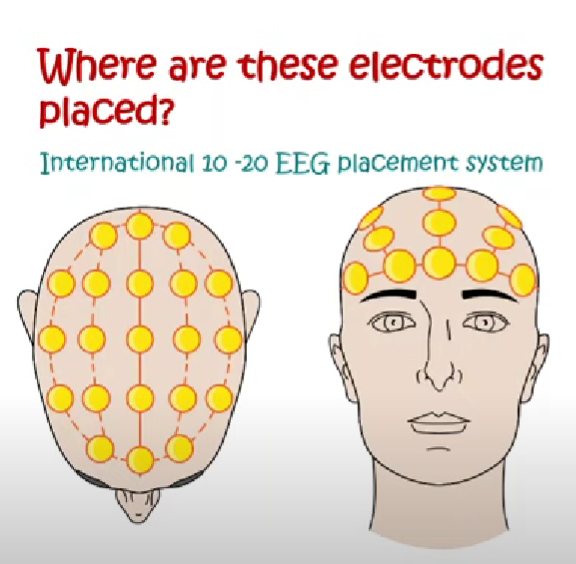

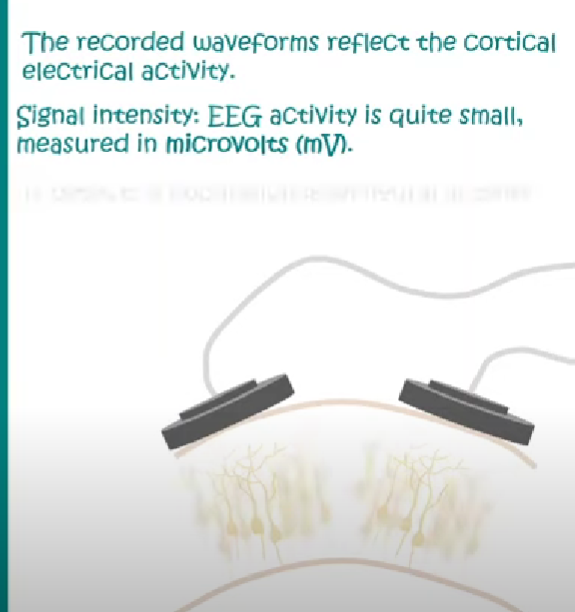

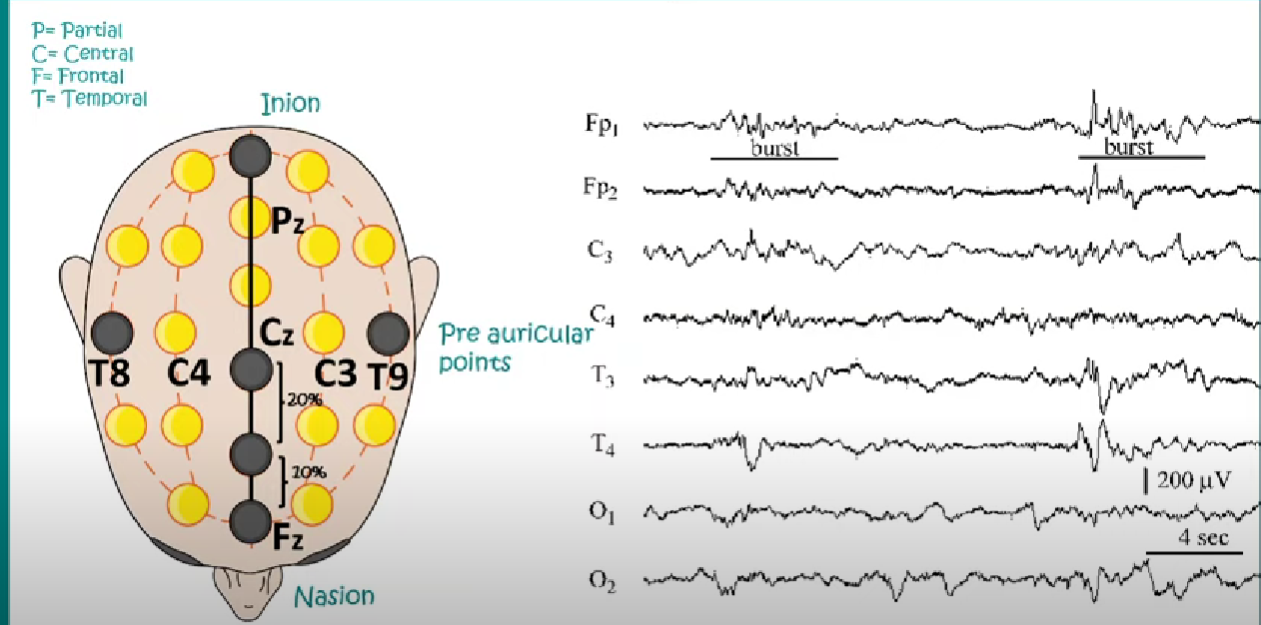

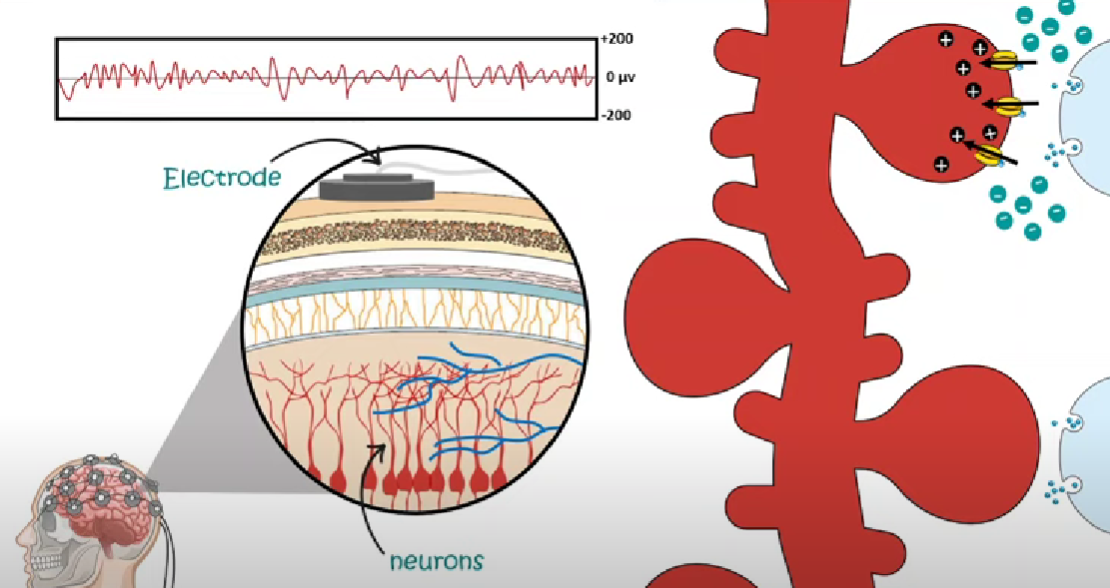

## **3. Đặc điểm của dữ liệu EEG**
- Tín hiệu: Dạng sóng thời gian, biểu thị điện thế não thay đổi theo thời gian.
$$S(t) = A \cdot \sin(2\pi ft + \phi)$$
- Biên độ: Biểu thị sự hoạt động của các vùng não bộ, đặc trưng bởi các dao động (oscillations) trong các dải tần số:
 - Delta (1-4 Hz): Liên quan đến trạng thái thư giãn sâu.
 - Theta (4-8 Hz): Biểu hiện sự buồn ngủ hoặc thả lỏng tinh thần.
 - Alpha (8-12 Hz): Đặc trưng cho trạng thái thư giãn hoặc buồn ngủ.
- Khả năng phân biệt:
 - Ở trạng thái tập trung, hoạt động ở các kênh thùy trán (F3, F4, Fz) tăng lên, đặc biệt trong băng tần 1-5 Hz.
 - Ở trạng thái buồn ngủ, tín hiệu alpha (8-12 Hz) nổi bật tại các kênh thùy đỉnh (Cz, Pz).

### **3.1 Tổng quan dữ liệu**

- Tổng số giờ EEG: 25 giờ (5 người x 5 phiên x ~1 giờ/phiên).
- Số trạng thái: **3** (tập trung, không tập trung, buồn ngủ).
- Dữ liệu mỗi người: Trung bình 5-6 phiên dữ liệu đầy đủ từ 14 kênh EEG.

## **4. Kết luận:**

**Dữ liệu EEG** ban đầu bao gồm 25 kênh tín hiệu, nhưng chỉ các kênh từ 4 đến 17 là hữu ích cho phân tích. Việc tập trung vào các kênh EEG này không chỉ tối ưu hóa khối lượng dữ liệu mà còn đảm bảo tập trung vào các tín hiệu thực sự liên quan đến hoạt động não bộ. Các bước chuẩn bị dữ liệu này sẽ hỗ trợ hiệu quả cho các giai đoạn tiếp theo như tiền xử lý, trích xuất đặc trưng, và xây dựng mô hình học máy.